In [6]:
# Get gropt and compile it, %%capture hides the long compile output
#%%capture
#!git clone https://github.com/mloecher/gropt
#%cd gropt/python
#!python setup.py build_ext --inplace

import sys
sys.path.append('/Users/dbe/Documents/GitHub/gropt/python/')
import numpy as np
import gropt # Download GrOpt from GitHub: https://github.com/mloecher/gropt
import matplotlib.pyplot as plt

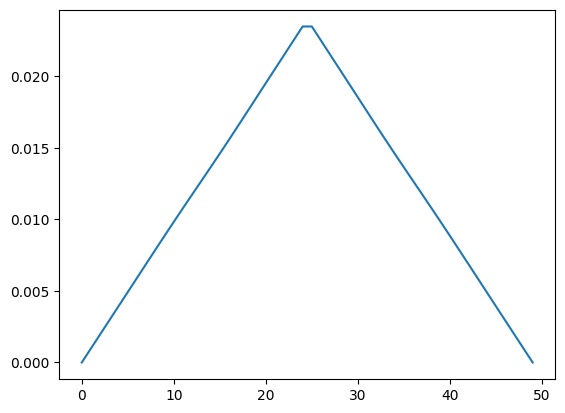

In [7]:
# Make a simple M0 encoding gradient
params = {}
params['mode'] = 'free'
params['gmax']  = 50.0  # Max Gradient Amplitude [mT/m]
params['smax']  = 50.0  # Max Slewrate [mT/m/ms]
params['moment_params']  = [[0, 0, 0, -1, -1, 11.74, 1.0e-3]]
params['TE']  = 1.0
params['dt']  = 20e-6

G, dd = gropt.gropt(params);

plt.plot(G.T)

In [ ]:
# Generate M0 nulled diffusion waveform
params = {}
# Maximize b-value for diffusion waveforms
params['mode'] = 'diff_bval'

# Hardware constraints
params['gmax']  = 50.0 # Max Gradient Amplitude [mT/m]
params['smax']  = 50.0 # Max Slewrate [mT/m/ms]

# Moment nulling
params['MMT']  = 0

# Sequence TE and dt of output [ms]
params['TE']  = 60
params['dt']  = 200e-6

# Time from end of diffusion waveform to TE [ms]
params['T_readout']  = 16.0
# Time of excitation 90 [ms]
params['T_90']  = 4.0
# Time for 180 flip [ms]
params['T_180']  = 6.0

# Run optimization
G, dd = gropt.gropt(params, verbose=1)

plt.figure()
plt.plot(G.T)

In [ ]:
# Define the params dictionary
params = {}
params['mode'] = 'diff_bval'
params['gmax'] = 50e-3       # Maximum gradient amplitude [T/m]
params['smax'] = 100         # Maximum slew rate [T/m/s]
params['MMT'] = 0            # Desired moment nulling (M0 = 0 for Monopolar)
params['b'] = 1000           # Diffusion b-value [s/mm^2]
params['T_readout'] = 0      # Time from start to center of EPI readout [ms]
params['T_90'] = 0.0         # Duration of excitation pulse [ms]
params['T_180'] = 6.0        # Duration of refocusing pulse [ms]
params['dt'] = 100e-6        # Gradient raster time for optimization [s]

params['TE']  = 60

# Separate variables (not part of params in original)
tmin = 5                     # Minimum time search [ms]
tmax = 100                   # Maximum time search [ms]
t_epi = 40                   # We set T_readout=0 to force a monopolar solution...

# Run optimization
G, dd = gropt.gropt(params, verbose=1)

# Call the gradient generation function (you need to implement this)
# G = get_min_TE_diff(params['b'], tmin, tmax, params)

# Calculate the resulting b-value
#b = get_bval(G, params)

# Calculate echo time (TE) in ms
TE = len(G) * params['dt'] * 1000 + t_epi / 2

# Generate the time vector in ms
t = 1000 * np.arange(0, len(G)) * params['dt']

# Plot the gradient waveform
plt.figure()
plt.plot(t, -G)
plt.axis([0, 70, -0.1 * params['gmax'], 1.1 * params['gmax']])
plt.xlabel('Time [ms]')
plt.ylabel('G(t) [T/m]')
#plt.title(f"A. MONO bval = {b:.0f} s/mm², TE = {TE:.1f} ms")
plt.grid(True)
plt.tight_layout()
plt.show()